# Titanic_train Survival Prediction 

Description: This problem is based on the sinking of unsinkable ship named 'Titanic'. Predicting the arbitrary passengers on titanic 
would survive or not. This dataset gives information about multiple people like their ages, sexes, sibling counts, embarkment points and survived as target value. Based on the labels we can say that the problem is classification.

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics #accuracy measure
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix #for confusion matrix

In [52]:
titanic=pd.read_csv("titanic_train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
titanic.shape #checking total no. of rows & columns

(891, 12)

In [54]:
titanic.describe()  #statistical summary

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Observation: reviewing the statistical summary we noticed that there is huge range difference between min & max values of few columns.

# Checking Null Values 

In [55]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

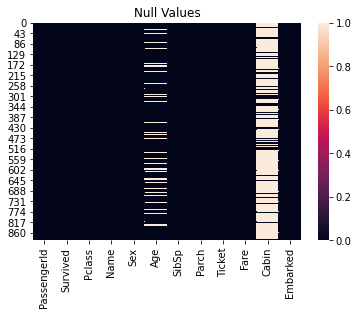

In [56]:
sns.heatmap(titanic.isnull())
plt.title('Null Values')
plt.show()

Above result shows that 'Age','Cabin' and 'Embarked' have missing values thus need to clean the data.


# Cleaning the Data

Cabin has maximum missing values thus need to clean it by dropping the column as its not contributing much.

In [57]:
titanic.drop(['Cabin'],axis=1,inplace=True)

In [58]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In 'Age' column has 177 missing values thus need to fill it. 

In [59]:
Age_mean=titanic['Age'].mean()

In [60]:
titanic['Age']=titanic['Age'].fillna(Age_mean)

In [61]:
titanic['Embarked'].fillna('S', inplace=True)

In [62]:
titanic['Age'].isnull().sum()

0

In [63]:
titanic['Embarked'].isnull().sum()

0

Now we have 0 null values in column 'Age'

Observation: Columns data which are affecting the survival of parrengers are sex, Age, Pclass, Fare

In [64]:
features=titanic[["Pclass","Sex","Age","Fare"]]
target=titanic["Survived"]

We can see that 'Sex' column is not present in numeric value thus need to convert it into numeric using Label Encoder.

# Label Encoder

In [65]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [66]:
titanic['Sex']=le.fit_transform(titanic['Sex'])


In [67]:
titanic['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)

In [68]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,1


In [69]:
# We can see in above table that 'Sex' column is now present in numeric values.

# EDA

Univarient Analysis

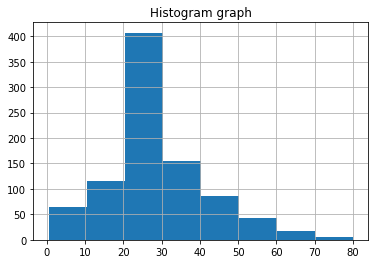

In [70]:
titanic['Age'].hist(bins=8)
plt.title('Histogram graph')
plt.show()

Text(0.5, 1.0, 'Survival Distribution')

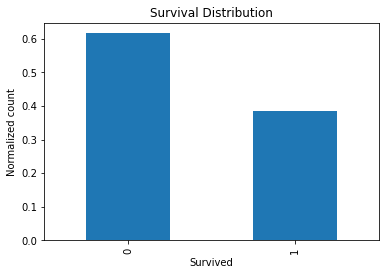

In [71]:
titanic['Survived'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Survived')
plt.ylabel('Normalized count')
plt.title('Survival Distribution')

Above graph shows that more than 60% people died as per record. 

Text(0.5, 1.0, 'Ticket class Distribution')

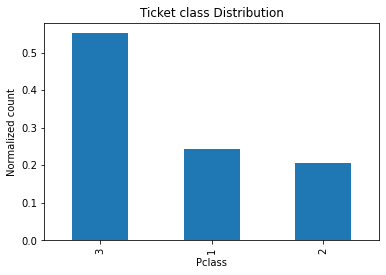

In [72]:
titanic['Pclass'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Normalized count')
plt.title('Ticket class Distribution')

Above graph shows that more than 50% people booked Class 3 tickets.

Text(0.5, 1.0, 'Gender Distribution')

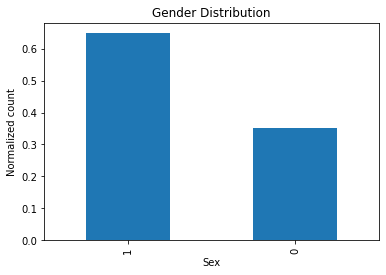

In [73]:
titanic['Sex'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Normalized count')
plt.title('Gender Distribution')

Above graph shows that males(1) are twice of females(0) count.

Text(0.5, 1.0, 'Age Distribution')

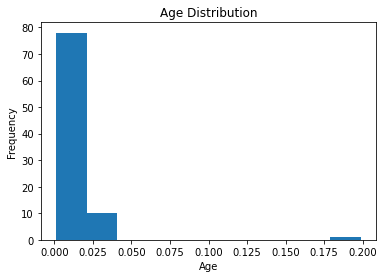

In [74]:
titanic['Age'].value_counts(normalize=True).plot(kind='hist')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

Now we can calculate the median age of passengers who are grouped by ticket class and sex as well assigning the null values to present 
in those groups.

Like this we can check different features distributed.

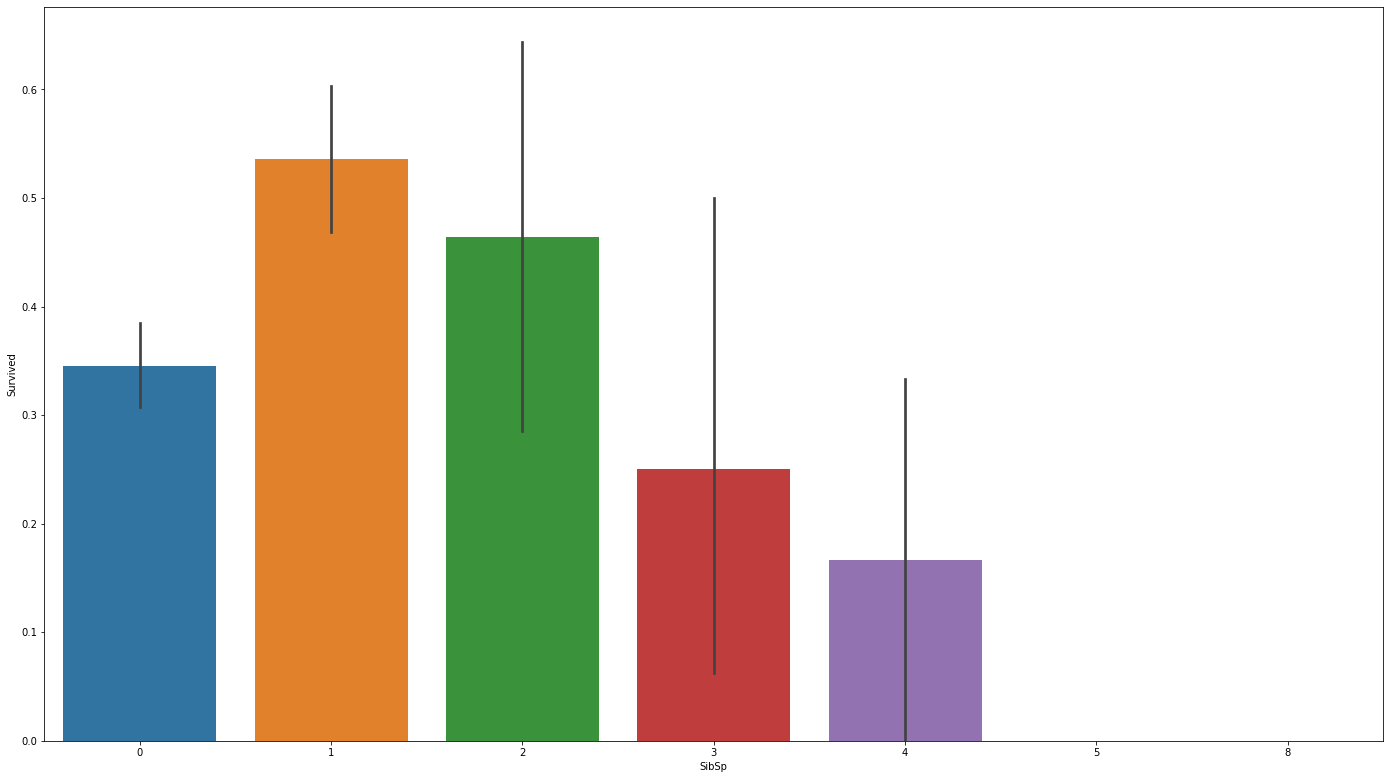

In [75]:
plt.figure(figsize=(24,13.5))
sns.barplot(data=titanic, x='SibSp', y='Survived')
plt.show()

Filling null values with median value

In [76]:
titanic['Age']=titanic.groupby(['Sex','Pclass'])['Age'].transform(lambda x:x.fillna(x.median()))




Checking the visualization how the features are related to target variable i.e. Survived or not

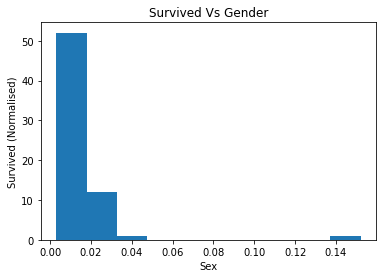

In [77]:
titanic['Age'][titanic['Survived']==1].value_counts(normalize=True, ascending=True).plot(kind='hist')
plt.title('Survived Vs Gender')
plt.xlabel('Sex')
plt.ylabel('Survived (Normalised)')
plt.show()

# Feature Engineering

The Sibsp and Parch are having same influence thus we can combine both as a new feature named as 'family'

In [78]:
titanic['family']=titanic['SibSp']+titanic['Parch']+1

In [79]:
titanic.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex        Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.000000      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.000000      1   
2                               Heikkinen, Miss. Laina    0  26.000000      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.000000      1   
4                             Allen, Mr. William Henry    1  35.000000      0   
..                       

# Checking Correlation 

In [80]:
titanic.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.030467,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,0.106811,0.016639
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.045702,0.065997
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,-0.116569,-0.200988
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,0.007461,-0.248512
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059961,0.890712
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,-0.078665,0.783111
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,0.062142,0.217138
Embarked,-0.030467,0.106811,0.045702,-0.116569,0.007461,-0.059961,-0.078665,0.062142,1.000000,-0.080281
family,-0.040143,0.016639,0.065997,-0.200988,-0.248512,0.890712,0.783111,0.217138,-0.080281,1.000000


<AxesSubplot:>

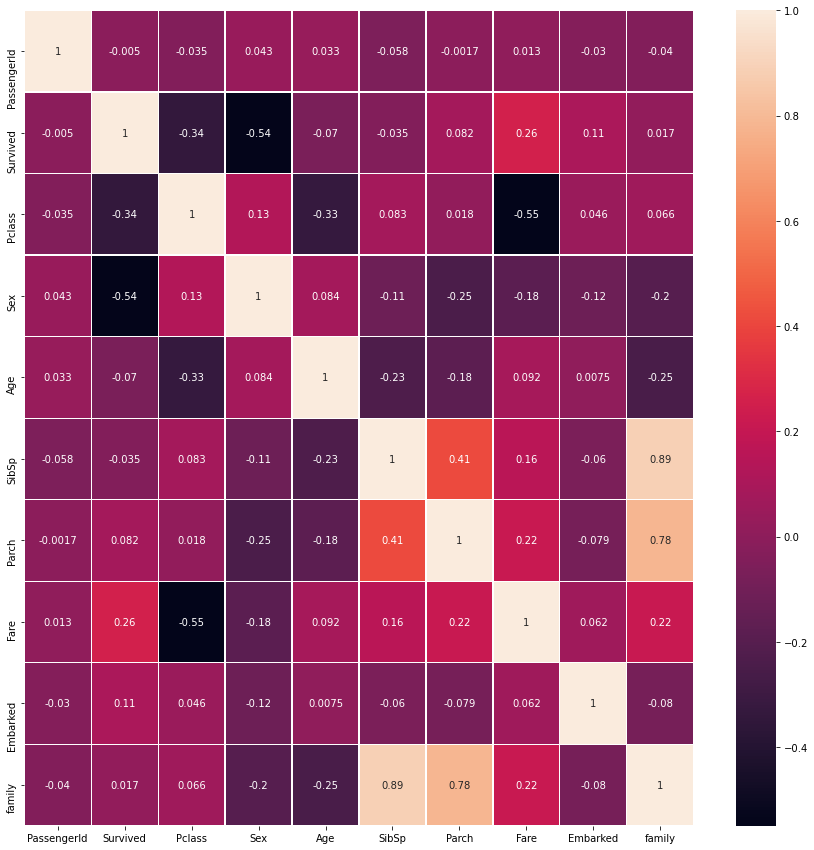

In [81]:
plt.figure(figsize=(15,15))
sns.heatmap(titanic.corr(),annot=True,linewidths=0.2)

Observation: with above graph we can noticed that features are not much correlated with each other.

In [82]:
titanic.drop(['Name','Ticket','Fare','PassengerId'],axis=1,inplace=True)

In [83]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,family
0,0,3,1,22.0,1,0,0,2
1,1,1,0,38.0,1,0,1,2
2,1,3,0,26.0,0,0,0,1
3,1,1,0,35.0,1,0,0,2
4,0,3,1,35.0,0,0,0,1


In [84]:
#titanic.drop(['Embarked'],axis=1,inplace=True)

In [85]:
x=titanic[titanic.columns[1:]]
y=titanic['Survived']

In [86]:

#x = titanic.drop(labels = "Survived", axis = 1)
#y = titanic["Survived"].values.reshape(-1, 1)
#x.shape


In [87]:
y.shape

(891,)

# Splitting in X and Y

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [89]:
titanic.isnull().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
family      0
dtype: int64

# Testing Models

Logistic Regression

In [90]:
lr=LogisticRegression()

In [91]:
lr.fit(x_train,y_train)

LogisticRegression()

In [92]:
predlr=lr.predict(x_test)

In [93]:
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(predlr,y_test))

The accuracy of the Logistic Regression is 0.8100558659217877


KNeighbors Classifier

In [94]:
knn = KNeighborsClassifier(n_neighbors= 7) 
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [95]:
predknn=knn.predict(x_test)

In [96]:
print('The accuracy of the KNeighborsClassifier is',confusion_matrix(predlr,y_test))

The accuracy of the KNeighborsClassifier is [[90 19]
 [15 55]]


Random Forest Classifier

In [97]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
predmodel=model.predict(x_test)

In [98]:
print('The accuracy of the Randonforestclassifier is',metrics.accuracy_score(predlr,y_test))

The accuracy of the Randonforestclassifier is 0.8100558659217877


Decision Tree Classifier

In [102]:
dt = DecisionTreeClassifier() 
dt.fit(x_train, y_train)  
preddt = dt.predict(x_test)  


In [103]:
print('The accuracy of the Decision Tree Classifier is',metrics.accuracy_score(preddt,y_test))

The accuracy of the Decision Tree Classifier is 0.7877094972067039


Conclusion: From all above performed models, Randomforestclassifier proved to be best model for accurate prediction of survival.